In [100]:
import math
from matplotlib import pyplot as plt
import numpy as np

In [101]:
def Gaussian(x, mu, sigma2):
    return 1 / math.sqrt(2 * math.pi * sigma2) * math.exp(-0.5 * (x - mu)**2 / sigma2)

def plotG(mu, sigma, *args):
    X = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 101)
    Y = [Gaussian(x, mu=mu, sigma2 = sigma**2) for x in X]
    plt.plot(X, Y, *args) 
    plt.grid()

0.3989422804014327


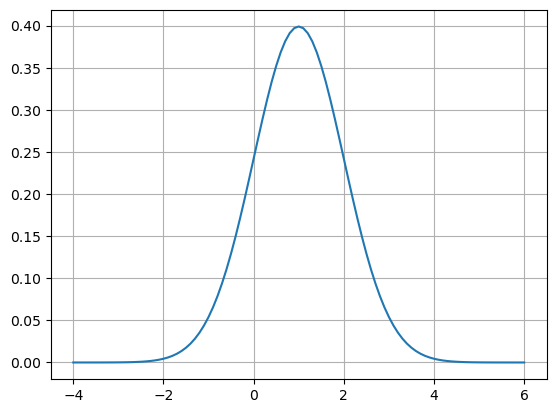

In [102]:
print(Gaussian(0, mu=0, sigma2=1))
plotG(mu=1, sigma=1)

In [103]:
def update(mu1, var1, mu2, var2):
    var = 1 / (1 / var1 + 1 / var2)
    mu = (mu1 * var2 + mu2 * var1) / (var1 + var2)
    # print
    return mu, var



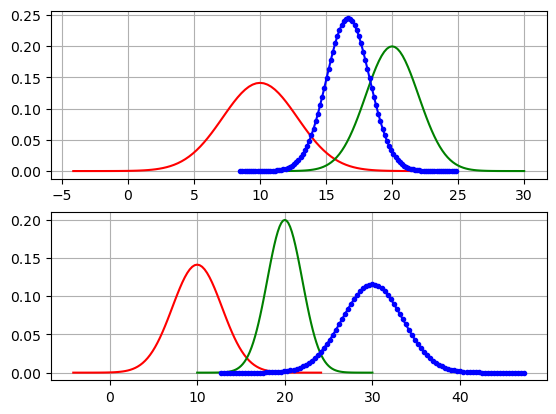

In [248]:
plt.subplot(211)
mu1, var1 = 10, 8
plotG(mu1, math.sqrt(var1), 'r')

mu2, var2 = 20, 4
plotG(mu2, math.sqrt(var2), 'g')

mu3, var3 = update(mu1, var1, mu2, var2)
plotG(mu3, math.sqrt(var3), 'b.-')

plt.subplot(212)
mu1, var1 = 10, 8
plotG(mu1, math.sqrt(var1), 'r')

mu2, var2 = 20, 4
plotG(mu2, math.sqrt(var2), 'g')

mu3, var3 = predict(mu1, var1, mu2, var2)
plotG(mu3, math.sqrt(var3), 'b.-')

In [246]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

In [106]:
motions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
motion_sigma = 2.

measurements = [7, 8, 15, 10, 11, 12, 13, 14, 15, 16]
measurements_sigma = 4.

mu = 0
sigma = 100.

print(f'{mu = }, {sigma = }')
t = 0

mu = 0, sigma = 100.0


In [107]:
mu, sigma = predict(mu, sigma, motions[t], motion_sigma)
print(f'{mu = :3f}, {sigma = :3f}', flush=True)
mu, sigma = update(mu, sigma, measurements[t], measurements_sigma)
print(f'{mu = :3f}, {sigma = :3f}', flush=True)
t += 1

mu = 1.000000, sigma = 102.000000
mu = 6.773585, sigma = 3.849057


In [56]:
for t in range(len(measurements)):
    mu, sigma = predict(mu, sigma, motions[t], motion_sigma)
    print(f'{mu = :3f}, {sigma = :3f}', flush=True)
    mu, sigma = update(mu, sigma, measurements[t], measurements_sigma)
    print(f'{mu = :3f}, {sigma = :3f}', flush=True)

mu = 7.773585, sigma = 5.849057
mu = 7.314176, sigma = 2.375479
mu = 8.314176, sigma = 4.375479
mu = 8.150046, sigma = 2.089661
mu = 9.150046, sigma = 4.089661
mu = 12.107442, sigma = 2.022167
mu = 13.107442, sigma = 4.022167
mu = 11.549428, sigma = 2.005526
mu = 12.549428, sigma = 4.005526
mu = 11.774179, sigma = 2.001381
mu = 12.774179, sigma = 4.001381
mu = 12.387023, sigma = 2.000345
mu = 13.387023, sigma = 4.000345
mu = 13.193503, sigma = 2.000086
mu = 14.193503, sigma = 4.000086
mu = 14.096750, sigma = 2.000022
mu = 15.096750, sigma = 4.000022
mu = 15.048375, sigma = 2.000005
mu = 16.048375, sigma = 4.000005
mu = 16.024188, sigma = 2.000001


# Мои пытки

In [108]:
import random

In [109]:
mu_GPS = 0
sigma_GPS = 100.
motions_GPS = [1 for i in range(10)]
motion_sigma_GPS = 4.
measurements_GPS = [1 + random.uniform(-0.5, 0.5) for i in range(10)]
measurements_sigma_GPS = 8.
# t_GPS = 1

mu_OBD = 0
sigma_OBD = 10.
motions_OBD = [1 for i in range(100)]
motion_sigma_OBD = 2.
measurements_OBD = [1 + random.uniform(-0.1, 0.1) for i in range(100)]
measurements_sigma_OBD = 4.
# t_OBD = 0.1

update: mu_OBD = 0.906398, sigma_OBD = 2.600000
update: mu_OBD = 1.197754, sigma_OBD = 2.162162
update: mu_OBD = 1.412613, sigma_OBD = 2.041379
update: mu_OBD = 1.409682, sigma_OBD = 2.010399
update: mu_OBD = 1.493293, sigma_OBD = 2.002603
update: mu_OBD = 1.452703, sigma_OBD = 2.000651
update: mu_OBD = 1.334293, sigma_OBD = 2.000163
update: mu_OBD = 1.431035, sigma_OBD = 2.000041
update: mu_OBD = 1.541634, sigma_OBD = 2.000010
update: mu_OBD = 1.536963, sigma_OBD = 2.000003


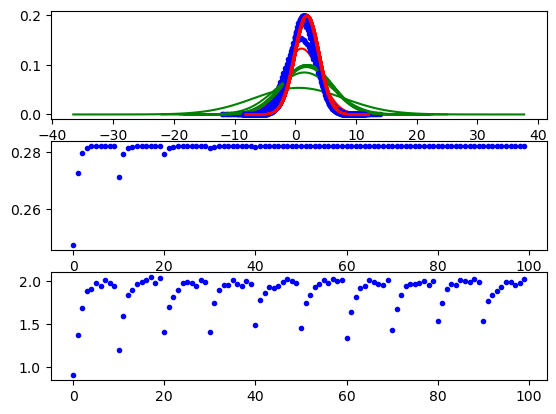

In [111]:
for t in range(len(measurements_OBD)):
# for t in range(10):
    plt.subplot(311)
    # OBD
    mu_OBD, sigma_OBD = predict(mu_OBD, sigma_OBD, motions_OBD[t], motion_sigma_OBD)
    # print('predict:', f'{mu_OBD = :3f}, {sigma_OBD = :3f}', flush=True)
    mu_OBD, sigma_OBD = update(mu_OBD, sigma_OBD, measurements_OBD[t], measurements_sigma_OBD)
    # print('update:', f'{mu_OBD = :3f}, {sigma_OBD = :3f}', flush=True)
    plotG(mu_OBD, sigma_OBD, 'r')
    
    if t % 10 == 0:
        # GPS
        mu_GPS, sigma_GPS = predict(mu_GPS, sigma_GPS, motions_GPS[t//10], motion_sigma_GPS)
        # print('predict:', f'{mu_GPS = :3f}, {sigma_GPS = :3f}', flush=True)
        mu_GPS, sigma_GPS = update(mu_GPS, sigma_GPS, measurements_GPS[t//10], measurements_sigma_GPS)
        # print('update:', f'{mu_GPS = :3f}, {sigma_GPS = :3f}', flush=True)
        plotG(mu_GPS, sigma_GPS, 'g')

        # GPS and OBD
        mu_OBD, sigma_OBD = predict(mu_GPS, sigma_GPS, motions_OBD[t], motion_sigma_OBD)
        # print('predict:', f'{mu_OBD = :3f}, {sigma_OBD = :3f}', flush=True)
        mu_OBD, sigma_OBD = update(mu_GPS, sigma_GPS, measurements_OBD[t], measurements_sigma_OBD)
        print('update:', f'{mu_OBD = :3f}, {sigma_OBD = :3f}', flush=True)
        plotG(mu_OBD, sigma_OBD, 'b.-')
    
    plt.subplot(312)
    plt.plot(t, Gaussian(mu_OBD, mu_OBD, sigma_OBD), 'b.-')
    # plt.title('Как я понял это значение вероятностей (вычисление норм. распр. в тчк мат ожидания)',fontsize=10)

    plt.subplot(313)
    plt.plot(t, mu_OBD, 'b.-')
    

Попыт 2 (Скорость не изменчива и равна 10)

In [235]:
# начальные условия:
mu = 10
sigma2 = 2.
motions = 0. # предположение что 0, так как скорость не меняется
motion_sigma2 = 2.

# GPS
measurements_GPS = [10 + random.uniform(-3, 3) for i in range(10)]
measurements_sigma2_GPS = 8.
# # t_GPS = 1 - время срабатывания в секундах

# OBD
measurements_OBD = [10 + random.uniform(-1, 1) for i in range(100)]
measurements_sigma2_OBD = 4.
# t_OBD = 0.1 - время срабатывания в секундах

predict: mu = 10.000000, sigma2 = 4.000000
update: mu = 10.880285, sigma2 = 2.666667
update: mu = 10.514750, sigma2 = 1.600000


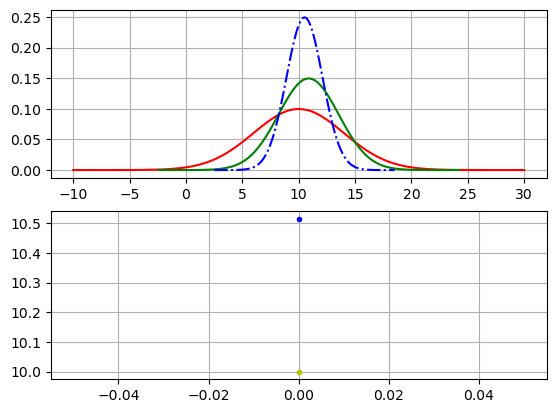

In [236]:
# одна итерация
t = 0

plt.subplot(211)
mu, sigma2 = predict(mu, sigma2, motions, motion_sigma2)
print('predict:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
plotG(mu, sigma2, 'r')

mu, sigma2 = update(mu, sigma2, measurements_GPS[t], measurements_sigma2_GPS)
print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
plotG(mu, sigma2, 'g')

mu, sigma2 = update(mu, sigma2, measurements_OBD[t], measurements_sigma2_OBD)
print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
plotG(mu, sigma2, 'b-.')

plt.subplot(212)
plt.plot(t, mu, 'b.-')
plt.plot(t, 10, 'y.')
plt.grid()

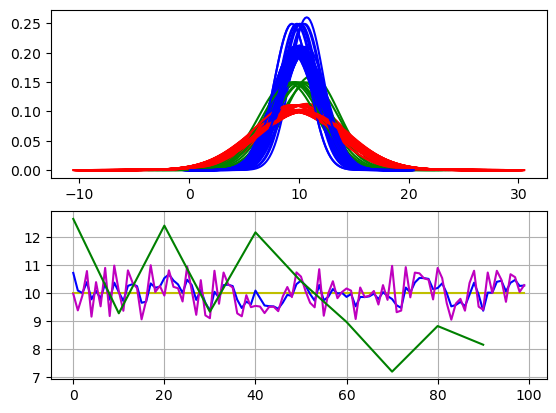

In [237]:
kalman = np.array([])
GPS = np.array([])
OBD = np.array([])

for t in range(len(measurements_OBD)):

    plt.subplot(211)
    mu, sigma2 = predict(mu, sigma2, motions, motion_sigma2)
    # print('predict:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    plotG(mu, sigma2, 'r')

    if t % 10 == 0:
        mu, sigma2 = update(mu, sigma2, measurements_GPS[t//10], measurements_sigma2_GPS)
        # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
        plotG(mu, sigma2, 'g')
        GPS = np.append(GPS, mu)
    
    mu, sigma2 = update(mu, sigma2, measurements_OBD[t], measurements_sigma2_OBD)
    # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    plotG(mu, sigma2, 'b')

    kalman = np.append(kalman, mu)
    OBD = np.append(OBD, mu)

time = np.arange(0,100,1)
time_GPS = np.arange(0,100,10)
real = np.full(100, 10)
plt.subplot(212)
plt.plot(time, real, 'y')
plt.plot(time, kalman, 'b')
plt.plot(time, measurements_OBD, 'm')
plt.plot(time_GPS, measurements_GPS, 'g')
plt.grid()

Попыт 3 пробуем подружиться с файликом

In [394]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
import random

In [395]:
df = pd.read_csv('data1.csv')
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


In [419]:
time_OBD = df.iloc[:, 1].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist() # km/h
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist() # km/h

time_GPS = [x[11:19] for x in time_GPS]
time_OBD = [x[12:] for x in time_OBD]

# time_GPS = [int(x[:2])*3600 + int(x[3:5])*60 + int(x[6:]) for x in time_GPS] # перевод в секунды
# time_OBD = [int(x[:2])*3600 + int(x[3:5])*60 + float(x[6:]) for x in time_OBD] # перевод в секунды

speed_OBD = [float(x) for x in speed_OBD]
speed_GPS = [float(x) if x != '-' else 0 for x in speed_GPS]

time = np.linspace(0, 22280, 22281)

In [420]:
# начальные условия:
mu = speed_OBD[0]
sigma2 = 100.
motions = 0.
motion_sigma2 = 2.

# GPS
measurements_sigma2_GPS = 8.

# OBD
measurements_sigma2_OBD = 4.

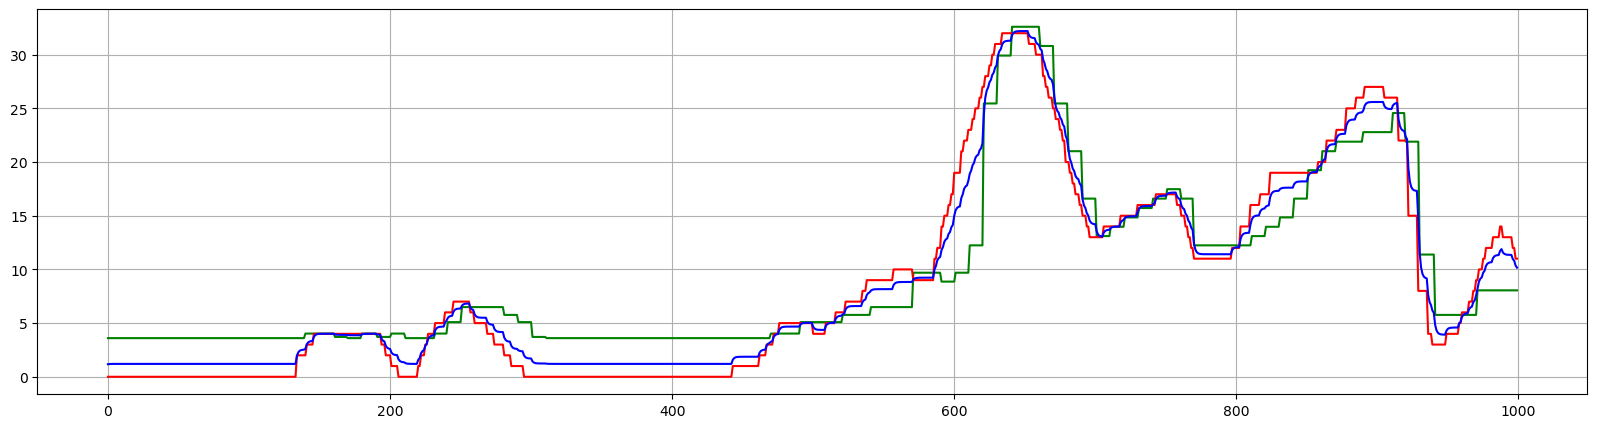

In [421]:
kalman = np.array([])

# for t in range(len(time_OBD)):
for t in range(1000):

    # motions = (speed_OBD[t]+speed_GPS[t])/2

    # plt.subplot(211)
    mu, sigma2 = predict(mu, sigma2, motions, motion_sigma2)
    # print('predict:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'r')

    measurements_GPS = speed_GPS[t] #+ random.uniform(-3, 3)
    mu, sigma2 = update(mu, sigma2, measurements_GPS, measurements_sigma2_GPS)
    # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'g')

    measurements_OBD = speed_OBD[t] #+ random.uniform(-1, 1)
    mu, sigma2 = update(mu, sigma2, measurements_OBD, measurements_sigma2_OBD)
    # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'b')

    kalman = np.append(kalman, mu)
    
# plt.subplot(212)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
# plt.plot(time, speed_GPS, 'g')
# plt.plot(time, speed_OBD, 'r')
# plt.plot(time, kalman, 'b')
plt.plot(time[:1000], speed_GPS[:1000], 'g')
plt.plot(time[:1000], speed_OBD[:1000], 'r')
plt.plot(time[:1000], kalman, 'b')
plt.grid()

Пропадание 
данны  от GPS с 17:25 до 17:35

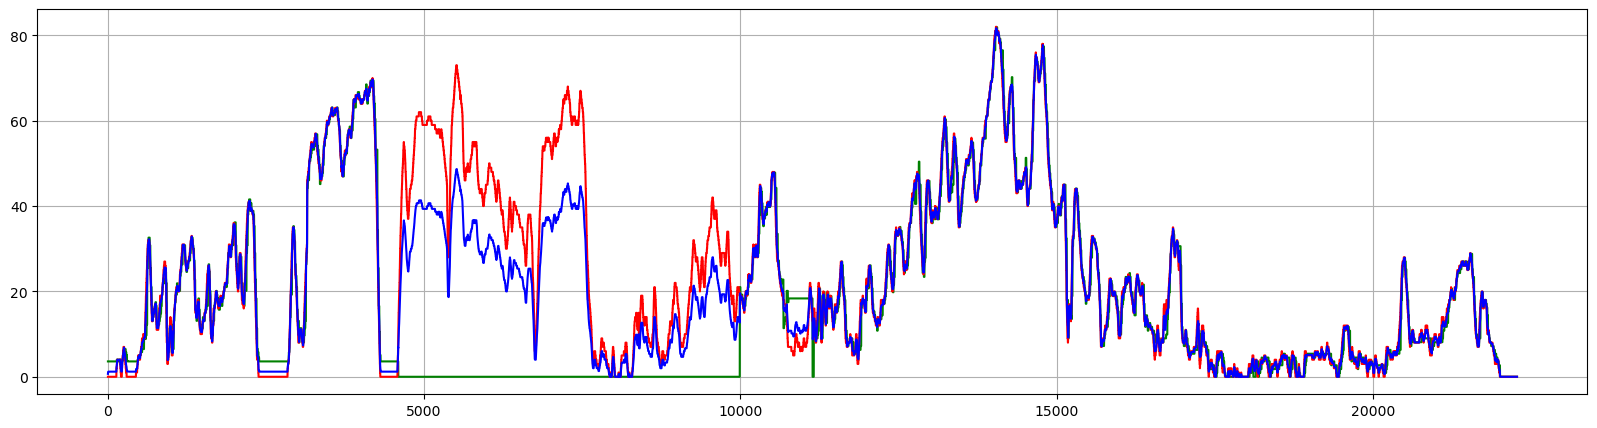

In [388]:
kalman = np.array([])

c = 0
for x in time_GPS:
    if int(x[3:5]) > 25 and int(x[3:5]) < 35:
        speed_GPS[c] = 0
    c += 1

for t in range(len(time_OBD)):
# for t in range(1000):

    # plt.subplot(211)
    mu, sigma2 = predict(mu, sigma2, motions, motion_sigma2)
    # print('predict:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'r')

    # x = time_GPS[t]
    # if int(x[3:5]) > 25 and int(x[3:5]) < 35:
    #     measurements_GPS = 0
    #     mu, sigma2 = update(mu, sigma2, measurements_GPS, measurements_sigma2_GPS)
    # else:
    measurements_GPS = speed_GPS[t] #+ random.uniform(-3, 3)
    mu, sigma2 = update(mu, sigma2, measurements_GPS, measurements_sigma2_GPS)
        # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
        # plotG(mu, sigma2, 'g')

    measurements_OBD = speed_OBD[t] #+ random.uniform(-1, 1)
    mu, sigma2 = update(mu, sigma2, measurements_OBD, measurements_sigma2_OBD)
    # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'b')

    kalman = np.append(kalman, mu)
    
# plt.subplot(212)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
# plt.plot(time, speed_GPS, 'g')
# plt.plot(time, speed_OBD, 'r')
# plt.plot(time, kalman, 'b')
plt.plot(time, speed_GPS, 'g')
plt.plot(time, speed_OBD, 'r')
plt.plot(time, kalman, 'b')
plt.grid()

Пропадание данных от OBD с 17:40 до 17:50

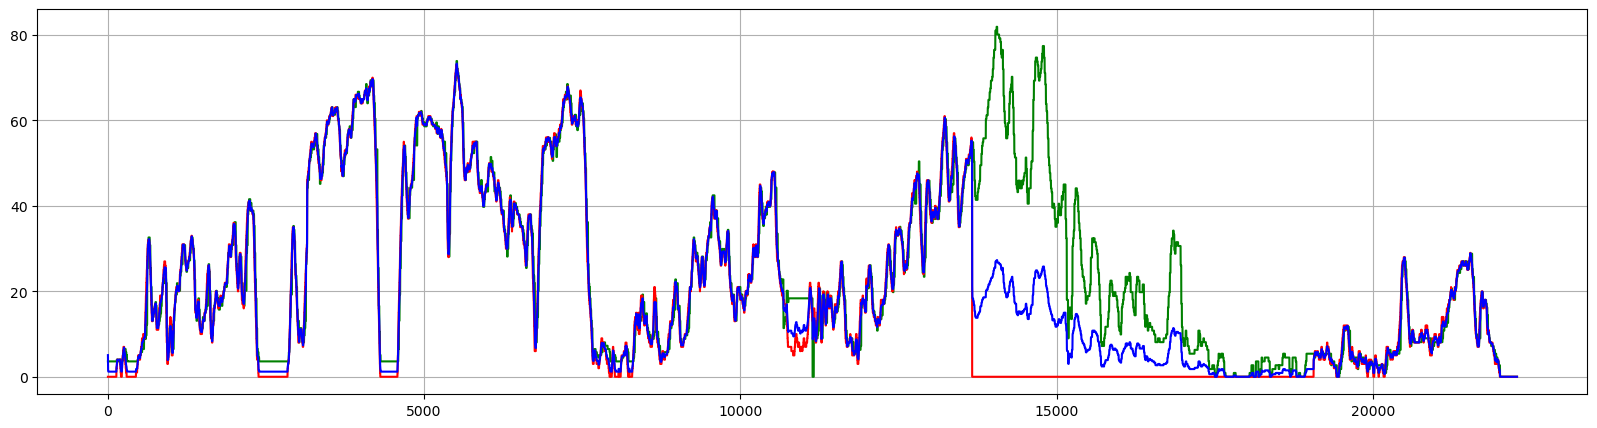

In [393]:
kalman = np.array([])

c = 0
for x in time_OBD:
    if int(x[3:5]) > 40 and int(x[3:5]) < 50:
        speed_OBD[c] = 0
    c += 1

for t in range(len(time_OBD)):
# for t in range(1000):

    # plt.subplot(211)
    mu, sigma2 = predict(mu, sigma2, motions, motion_sigma2)
    # print('predict:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'r')

    # x = time_GPS[t]
    # if int(x[3:5]) > 25 and int(x[3:5]) < 35:
    #     measurements_GPS = 0
    #     mu, sigma2 = update(mu, sigma2, measurements_GPS, measurements_sigma2_GPS)
    # else:
    measurements_GPS = speed_GPS[t] #+ random.uniform(-3, 3)
    mu, sigma2 = update(mu, sigma2, measurements_GPS, measurements_sigma2_GPS)
        # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
        # plotG(mu, sigma2, 'g')

    measurements_OBD = speed_OBD[t] #+ random.uniform(-1, 1)
    mu, sigma2 = update(mu, sigma2, measurements_OBD, measurements_sigma2_OBD)
    # print('update:', f'{mu = :3f}, {sigma2 = :3f}', flush=True)
    # plotG(mu, sigma2, 'b')

    kalman = np.append(kalman, mu)
    
# plt.subplot(212)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
# plt.plot(time, speed_GPS, 'g')
# plt.plot(time, speed_OBD, 'r')
# plt.plot(time, kalman, 'b')
plt.plot(time, speed_GPS, 'g')
plt.plot(time, speed_OBD, 'r')
plt.plot(time, kalman, 'b')
plt.grid()